In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
pd.set_option("display.max_column", None)
df = pd.read_csv("train.csv")
print(df.shape)
df.head(2)

(22083, 45)


,Patient Id,Patient Age,Genes in mother's side,Inherited from father,Maternal gene,Paternal gene,Blood cell count (mcL),Patient First Name,Family Name,Father's name,Mother's age,Father's age,Institute Name,Location of Institute,Status,Respiratory Rate (breaths/min),Heart Rate (rates/min,Test 1,Test 2,Test 3,Test 4,Test 5,Parental consent,Follow-up,Gender,Birth asphyxia,Autopsy shows birth defect (if applicable),Place of birth,Folic acid details (peri-conceptional),H/O serious maternal illness,H/O radiation exposure (x-ray),H/O substance abuse,Assisted conception IVF/ART,History of anomalies in previous pregnancies,No. of previous abortion,Birth defects,White Blood cell count (thousand per microliter),Blood test result,Symptom 1,Symptom 2,Symptom 3,Symptom 4,Symptom 5,Genetic Disorder,Disorder Subclass
0,PID0x6418,2.0,Yes,No,Yes,No,4.760603,Richard,NaN,Larre,NaN,NaN,Boston Specialty & Rehabilitation Hospital,"55 FRUIT ST\nCENTRAL, MA 02114\n(42.3624748574...",Alive,Normal (30-60),Normal,0.0,NaN,NaN,1.0,0.0,Yes,High,NaN,NaN,Not applicable,Institute,No,NaN,No,No,No,Yes,NaN,NaN,9.857562,NaN,1.0,1.0,1.0,1.0,1.0,Mitochondrial genetic inheritance disorders,Leber's hereditary optic neuropathy
1,PID0x25d5,4.0,Yes,Yes,No,No,4.910669,Mike,NaN,Brycen,NaN,23.0,St. Margaret's Hospital For Women,"1515 COMMONWEALTH AV\nALLSTON/BRIGHTON, MA 021...",Deceased,Tachypnea,Normal,NaN,0.0,0.0,1.0,0.0,Yes,High,NaN,No,None,NaN,Yes,Yes,Not applicable,Not applicable,No,Yes,NaN,Multiple,5.522560,normal,1.0,NaN,1.0,1.0,0.0,NaN,Cystic fibrosis


In [3]:
df.describe()

,Patient Age,Blood cell count (mcL),Mother's age,Father's age,Test 1,Test 2,Test 3,Test 4,Test 5,No. of previous abortion,White Blood cell count (thousand per microliter),Symptom 1,Symptom 2,Symptom 3,Symptom 4,Symptom 5
count,20656.000000,22083.000000,16047.000000,16097.000000,19956.0,19931.0,19936.0,19943.0,19913.0,19921.000000,19935.000000,19928.000000,19861.000000,19982.000000,19970.000000,19930.000000
mean,6.974148,4.898871,34.526454,41.972852,0.0,0.0,0.0,1.0,0.0,2.003062,7.486224,0.592483,0.551886,0.536233,0.497747,0.461917
std,4.319475,0.199663,9.852598,13.035501,0.0,0.0,0.0,0.0,0.0,1.411919,2.653393,0.491385,0.497313,0.498698,0.500007,0.498560
min,0.000000,4.092727,18.000000,20.000000,0.0,0.0,0.0,1.0,0.0,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.000000,4.763109,26.000000,31.000000,0.0,0.0,0.0,1.0,0.0,1.000000,5.424703,0.000000,0.000000,0.000000,0.000000,0.000000
50%,7.000000,4.899399,35.000000,42.000000,0.0,0.0,0.0,1.0,0.0,2.000000,7.477132,1.000000,1.000000,1.000000,0.000000,0.000000
75%,11.000000,5.033830,43.000000,53.000000,0.0,0.0,0.0,1.0,0.0,3.000000,9.526152,1.000000,1.000000,1.000000,1.000000,1.000000
max,14.000000,5.609829,51.000000,64.000000,0.0,0.0,0.0,1.0,0.0,4.000000,12.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [4]:
df.isnull().sum()

Patient Id                                             0
Patient Age                                         1427
Genes in mother's side                                 0
Inherited from father                                306
Maternal gene                                       2810
Paternal gene                                          0
Blood cell count (mcL)                                 0
Patient First Name                                     0
Family Name                                         9691
Father's name                                          0
Mother's age                                        6036
Father's age                                        5986
Institute Name                                      5106
Location of Institute                                  0
Status                                                 0
Respiratory Rate (breaths/min)                      2149
Heart Rate (rates/min                               2113
Test 1                         

###  Checking for data Imbalanceness

In [5]:
df['Disorder Subclass'].value_counts()

Leigh syndrome                         5160
Mitochondrial myopathy                 4405
Cystic fibrosis                        3448
Tay-Sachs                              2833
Diabetes                               1817
Hemochromatosis                        1355
Leber's hereditary optic neuropathy     648
Alzheimer's                             152
Cancer                                   97
Name: Disorder Subclass, dtype: int64

In [6]:
df["Genetic Disorder"].value_counts()

Mitochondrial genetic inheritance disorders     10202
Single-gene inheritance diseases                 7664
Multifactorial genetic inheritance disorders     2071
Name: Genetic Disorder, dtype: int64

### Combination Between Genetic Disorder and Disorder Subclass

In [7]:
for i in df["Genetic Disorder"].value_counts().index:
    print(i)
    print("\n")
    print(df[df["Genetic Disorder"] == i]['Disorder Subclass'].value_counts())
    print("\n\n")

Mitochondrial genetic inheritance disorders


Leigh syndrome                         4683
Mitochondrial myopathy                 3971
Leber's hereditary optic neuropathy     587
Name: Disorder Subclass, dtype: int64



Single-gene inheritance diseases


Cystic fibrosis    3145
Tay-Sachs          2556
Hemochromatosis    1228
Name: Disorder Subclass, dtype: int64



Multifactorial genetic inheritance disorders


Diabetes       1653
Alzheimer's     133
Cancer           91
Name: Disorder Subclass, dtype: int64





we can impute the value of Gentic Disorder from the Disorder Subclass

By this insight we can understand that Every syndrom has subcategorized into unique category and from **Disorder Subclass** we can calculate **"Genetic Disorder"** so we are droping the "Genetic Disorder" Latter we can   also predict this after we are over with "Disorder Subclass"

####  Putting values from Disorder Subclass

In [8]:
df['Genetic Disorders'] = np.where(df['Genetic Disorder'].isnull(),
                                 np.where(df['Disorder Subclass'].isin(["Leigh syndrome", "Mitochondrial myopathy", "Leber's hereditary optic neuropathy"]), "Mitochondrial genetic inheritance disorders", 
                                         np.where(df['Disorder Subclass'].isin(["Cystic fibrosis", "Tay-Sachs", "Hemochromatosis"]), "Single-gene inheritance diseases", 
                                                 np.where(df['Disorder Subclass'].isin(["Diabetes", "Alzheimer's", "Cancer"]), "Multifactorial genetic inheritance disorders", df['Genetic Disorder']))), df['Genetic Disorder'])

In [9]:
# plt.subplot(1, 2, 1)
# # plt.figure(figsize=(5, 4))
# sns.countplot(df['Genetic Disorder'])

# plt.subplot(1, 2, 2)
# # plt.figure(figsize=(5, 4))
# sns.countplot(df['Genetic Disorders'])

# plt.show()


###  Giving The Short name to Disorder Subclass

In [10]:
df['Disorder Subclass'] = df["Disorder Subclass"].replace(["Leigh syndrome", "Mitochondrial myopathy", "Cystic fibrosis", "Tay-Sachs", "Hemochromatosis", "Leber's hereditary optic neuropathy", "Alzheimer's"], ["Leigh", "Mitochondrial", "Cystic", "Tay", "Hemo", "Leber's", "Alzheimer"])

In [11]:
df['Disorder Subclass'].value_counts()

Leigh            5160
Mitochondrial    4405
Cystic           3448
Tay              2833
Diabetes         1817
Hemo             1355
Leber's           648
Alzheimer         152
Cancer             97
Name: Disorder Subclass, dtype: int64

### Finding Information from Inst. Name

In [12]:
df['Institute_name'] = np.where(df['Institute Name'].isin([np.nan, 'Not applicable']), "Nan", df['Institute Name'])

In [13]:
df['Institute_name'].value_counts()

Nan                                              13546
Franciscan Children's  Hospital                    363
Carney Hospital                                    357
New England Medical Center                         350
Hebrew Rehabilitation Center                       349
VA Hospital                                        344
Shriners Burns Institute                           341
Massachusetts Eye & Ear Infirmary                  337
Brigham And Women's Hospital                       334
Boston City Hospital                               330
St. Margaret's Hospital For Women                  329
Arbour Hospital                                    327
Spaulding Rehabilitation Hospital                  325
Faulkner Hospital                                  325
Kindred Hospital                                   324
Children's Hospital                                324
Dana-farber Cancer Institute                       323
Boston Specialty & Rehabilitation Hospital         322
Massachuse

In [14]:
for i in df['Institute_name'].value_counts().index:
    print("Hospital Name: {}\n".format(i))
    print(df[df['Institute_name'] == i]['Disorder Subclass'].value_counts())
    print("\n\n")

Hospital Name: Nan

Leigh            3143
Mitochondrial    2643
Cystic           2094
Tay              1709
Diabetes         1093
Hemo              846
Leber's           402
Alzheimer          90
Cancer             57
Name: Disorder Subclass, dtype: int64



Hospital Name: Franciscan Children's  Hospital

Mitochondrial    90
Leigh            80
Cystic           55
Tay              44
Hemo             31
Diabetes         24
Leber's          11
Cancer            5
Alzheimer         1
Name: Disorder Subclass, dtype: int64



Hospital Name: Carney Hospital

Leigh            89
Mitochondrial    68
Cystic           64
Tay              45
Diabetes         33
Hemo             26
Leber's           9
Cancer            2
Name: Disorder Subclass, dtype: int64



Hospital Name: New England Medical Center

Leigh            72
Tay              65
Cystic           59
Mitochondrial    56
Diabetes         36
Hemo             23
Leber's           6
Alzheimer         5
Cancer            2
Name: Disorder S

In [15]:
# for i in df['Institute_name'].value_counts().index:
#     df[df['Institute_name'] == i]['Disorder Subclass'].value_counts().plot(kind='bar')
#     plt.title(i)
#     plt.show()

#####  Percentage wise

In [16]:
# for i in df['Institute_name'].value_counts().index:
#     df[df['Institute_name'] == i]['Disorder Subclass'].value_counts().plot(kind='pie', autopct='%1.1f%%')
#     print("\n\n\n")
#     plt.title(i)
#     plt.show()

Now you can see from this insight we can't get much information for time being  we are drop this col letter we can again take the col percentase wise for performence improvement

#### Getting Info from Place of Birth 

In [17]:
df.head(2)

,Patient Id,Patient Age,Genes in mother's side,Inherited from father,Maternal gene,Paternal gene,Blood cell count (mcL),Patient First Name,Family Name,Father's name,Mother's age,Father's age,Institute Name,Location of Institute,Status,Respiratory Rate (breaths/min),Heart Rate (rates/min,Test 1,Test 2,Test 3,Test 4,Test 5,Parental consent,Follow-up,Gender,Birth asphyxia,Autopsy shows birth defect (if applicable),Place of birth,Folic acid details (peri-conceptional),H/O serious maternal illness,H/O radiation exposure (x-ray),H/O substance abuse,Assisted conception IVF/ART,History of anomalies in previous pregnancies,No. of previous abortion,Birth defects,White Blood cell count (thousand per microliter),Blood test result,Symptom 1,Symptom 2,Symptom 3,Symptom 4,Symptom 5,Genetic Disorder,Disorder Subclass,Genetic Disorders,Institute_name
0,PID0x6418,2.0,Yes,No,Yes,No,4.760603,Richard,NaN,Larre,NaN,NaN,Boston Specialty & Rehabilitation Hospital,"55 FRUIT ST\nCENTRAL, MA 02114\n(42.3624748574...",Alive,Normal (30-60),Normal,0.0,NaN,NaN,1.0,0.0,Yes,High,NaN,NaN,Not applicable,Institute,No,NaN,No,No,No,Yes,NaN,NaN,9.857562,NaN,1.0,1.0,1.0,1.0,1.0,Mitochondrial genetic inheritance disorders,Leber's,Mitochondrial genetic inheritance disorders,Boston Specialty & Rehabilitation Hospital
1,PID0x25d5,4.0,Yes,Yes,No,No,4.910669,Mike,NaN,Brycen,NaN,23.0,St. Margaret's Hospital For Women,"1515 COMMONWEALTH AV\nALLSTON/BRIGHTON, MA 021...",Deceased,Tachypnea,Normal,NaN,0.0,0.0,1.0,0.0,Yes,High,NaN,No,None,NaN,Yes,Yes,Not applicable,Not applicable,No,Yes,NaN,Multiple,5.522560,normal,1.0,NaN,1.0,1.0,0.0,NaN,Cystic,Single-gene inheritance diseases,St. Margaret's Hospital For Women


In [18]:
df['Place of birth'].value_counts()

Institute    10073
Home          9886
Name: Place of birth, dtype: int64

In [19]:
# for i in df['Place of birth'].value_counts().index:
#     df[df['Place of birth'] == i]['Disorder Subclass'].value_counts().plot(kind='pie', autopct='%1.1f%%')
#     print("\n\n\n")
#     plt.title(i)
#     plt.show()

 Nothing much Info get we drop this too

### Dropiing Id,  Inst_name and loc_of Inst  col, place_of_Birth,  Genetic Disorder, Disorder_Subclass, 'Parental consent', test1...5

In [20]:
df.drop(['Patient Id', 'Institute Name', "Location of Institute", "Place of birth", "Institute_name", "Genetic Disorder", "Genetic Disorders", 'Patient First Name', 'Family Name', "Father's name", 'Parental consent', 'Test 1', 'Test 2', 'Test 3', 'Test 4', 'Test 5'], axis=1, inplace=True)

In [21]:
df.head(2)

,Patient Age,Genes in mother's side,Inherited from father,Maternal gene,Paternal gene,Blood cell count (mcL),Mother's age,Father's age,Status,Respiratory Rate (breaths/min),Heart Rate (rates/min,Follow-up,Gender,Birth asphyxia,Autopsy shows birth defect (if applicable),Folic acid details (peri-conceptional),H/O serious maternal illness,H/O radiation exposure (x-ray),H/O substance abuse,Assisted conception IVF/ART,History of anomalies in previous pregnancies,No. of previous abortion,Birth defects,White Blood cell count (thousand per microliter),Blood test result,Symptom 1,Symptom 2,Symptom 3,Symptom 4,Symptom 5,Disorder Subclass
0,2.0,Yes,No,Yes,No,4.760603,NaN,NaN,Alive,Normal (30-60),Normal,High,NaN,NaN,Not applicable,No,NaN,No,No,No,Yes,NaN,NaN,9.857562,NaN,1.0,1.0,1.0,1.0,1.0,Leber's
1,4.0,Yes,Yes,No,No,4.910669,NaN,23.0,Deceased,Tachypnea,Normal,High,NaN,No,None,Yes,Yes,Not applicable,Not applicable,No,Yes,NaN,Multiple,5.522560,normal,1.0,NaN,1.0,1.0,0.0,Cystic


we are droping Patient First Name, Family Name, Father's name, Because not realy impactfull info and Parental consent, Test1....5 because they have either nan values or Same Vales

### Adding Index

In [22]:
# df = df.reset_index()
# df.head(2)

We are adding index because it will help me letter at concatination time

### Droping nan from y

droping the nan value from y(Disorder Subclass) because we will predict the value

In [23]:
df.dropna(subset=['Disorder Subclass'], inplace= True)

In [24]:
df.isnull().sum()

Patient Age                                         1243
Genes in mother's side                                 0
Inherited from father                                263
Maternal gene                                       2405
Paternal gene                                          0
Blood cell count (mcL)                                 0
Mother's age                                        5196
Father's age                                        5119
Status                                                 0
Respiratory Rate (breaths/min)                      1857
Heart Rate (rates/min                               1788
Follow-up                                           1845
Gender                                              1863
Birth asphyxia                                      1809
Autopsy shows birth defect (if applicable)           897
Folic acid details (peri-conceptional)              1823
H/O serious maternal illness                        1831
H/O radiation exposure (x-ray) 

### Missing Value Imputing

In [25]:
#Splitting into X, y

X = df.drop('Disorder Subclass', axis=1)
y = df['Disorder Subclass']

#### Numerical Column

In [26]:
numerical_feature = [feature for feature in X.columns if X[feature].dtype !='O']
numerical_feature

['Patient Age',
 'Blood cell count (mcL)',
 "Mother's age",
 "Father's age",
 'No. of previous abortion',
 'White Blood cell count (thousand per microliter)',
 'Symptom 1',
 'Symptom 2',
 'Symptom 3',
 'Symptom 4',
 'Symptom 5']

### Numerical df

In [27]:
numerical_df = X[numerical_feature]
numerical_df.head(2)

,Patient Age,Blood cell count (mcL),Mother's age,Father's age,No. of previous abortion,White Blood cell count (thousand per microliter),Symptom 1,Symptom 2,Symptom 3,Symptom 4,Symptom 5
0,2.0,4.760603,NaN,NaN,NaN,9.857562,1.0,1.0,1.0,1.0,1.0
1,4.0,4.910669,NaN,23.0,NaN,5.522560,1.0,NaN,1.0,1.0,0.0


####  Get some insight from Numerical value

In [28]:
# plt.figure(figsize=(10,8))
# sns.heatmap(numerical_df.corr(), annot=True, linewidths=2, linecolor='black', cmap='Blues')
# plt.show()

In [29]:
# sns.pairplot(numerical_df)

In [30]:
# for i in numerical_df.columns:
#     print('\n\n\n')
#     print(i)
#     print("\n")
#     #print(abs(numerical_df.corrwith(numerical_df[i]).sort_values(ascending=False)[: 5]))
#     abs(numerical_df.corrwith(numerical_df[i]).sort_values(ascending=False)[1: 5]).plot(kind='bar')
#     plt.show()

By this Insight we can clearly see that Numerical variable doesn't correlated with each other. So we are trying to get some information from Categorical varialble

##### Numerical without nan values

In [31]:
num_non_null = numerical_df.dropna()
num_non_null.head(2)

,Patient Age,Blood cell count (mcL),Mother's age,Father's age,No. of previous abortion,White Blood cell count (thousand per microliter),Symptom 1,Symptom 2,Symptom 3,Symptom 4,Symptom 5
8,11.0,5.209058,45.0,44.0,0.0,6.669552,1.0,1.0,1.0,0.0,1.0
9,4.0,4.752272,44.0,42.0,1.0,6.397702,0.0,0.0,1.0,1.0,1.0


##### Numerical with nan values

In [32]:
num_with_na = numerical_df[numerical_df.isna().any(axis=1)]
num_with_na.head(2)

,Patient Age,Blood cell count (mcL),Mother's age,Father's age,No. of previous abortion,White Blood cell count (thousand per microliter),Symptom 1,Symptom 2,Symptom 3,Symptom 4,Symptom 5
0,2.0,4.760603,NaN,NaN,NaN,9.857562,1.0,1.0,1.0,1.0,1.0
1,4.0,4.910669,NaN,23.0,NaN,5.522560,1.0,NaN,1.0,1.0,0.0


#### Imputting nan values of numerical

In [33]:
# num_non_null_without_index = num_non_null.drop(['index'], axis=1)
# num_non_null_without_index.head(2)

In [34]:
from sklearn.impute import KNNImputer
imputer_knn = KNNImputer(n_neighbors=5, weights='distance')
imputer_knn.fit(num_non_null)


num_imp = imputer_knn.transform(num_with_na)

num_imp = pd.DataFrame(num_imp)
num_imp.columns = num_with_na.columns
num_imp.head(2)

,Patient Age,Blood cell count (mcL),Mother's age,Father's age,No. of previous abortion,White Blood cell count (thousand per microliter),Symptom 1,Symptom 2,Symptom 3,Symptom 4,Symptom 5
0,2.0,4.760603,41.451377,45.628143,2.231678,9.857562,1.0,1.000000,1.0,1.0,1.0
1,4.0,4.910669,35.258318,23.000000,1.445991,5.522560,1.0,0.378151,1.0,1.0,0.0


### Experimental 10

In [39]:
from sklearn.impute import KNNImputer
imputer_knn = KNNImputer(n_neighbors=10, weights='distance')
num_imp10 = imputer_knn.fit_transform(numerical_df)

num_imp10 = pd.DataFrame(num_imp10)
num_imp10.columns = numerical_df.columns
num_imp10.head(2)

,Patient Age,Blood cell count (mcL),Mother's age,Father's age,No. of previous abortion,White Blood cell count (thousand per microliter),Symptom 1,Symptom 2,Symptom 3,Symptom 4,Symptom 5
0,2.0,4.760603,36.979735,52.676732,0.365049,9.857562,1.0,1.000000,1.0,1.0,1.0
1,4.0,4.910669,35.665761,23.000000,1.864096,5.522560,1.0,0.102869,1.0,1.0,0.0


### Experimental 5

In [40]:
from sklearn.impute import KNNImputer
imputer_knn = KNNImputer(n_neighbors=5, weights='distance')
num_imp5 = imputer_knn.fit_transform(numerical_df)

num_imp5 = pd.DataFrame(num_imp5)
num_imp5.columns = numerical_df.columns
num_imp5.head(2)

,Patient Age,Blood cell count (mcL),Mother's age,Father's age,No. of previous abortion,White Blood cell count (thousand per microliter),Symptom 1,Symptom 2,Symptom 3,Symptom 4,Symptom 5
0,2.0,4.760603,37.559808,54.160991,0.306545,9.857562,1.0,1.0,1.0,1.0,1.0
1,4.0,4.910669,34.631332,23.000000,2.016719,5.522560,1.0,0.0,1.0,1.0,0.0


In [ ]:
dsafsd

#### data distrition

C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot

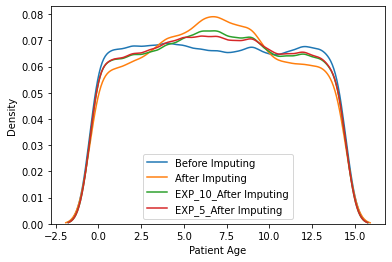

C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot

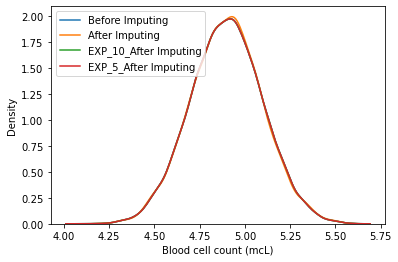

C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot

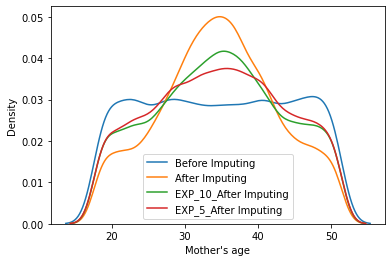

C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot

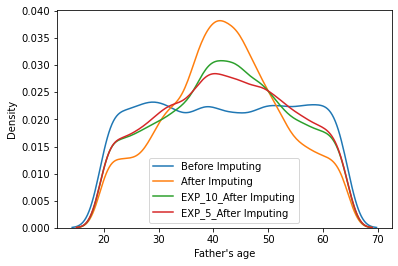

C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot

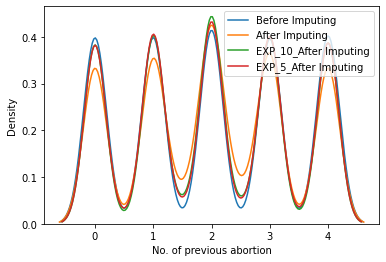

C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot

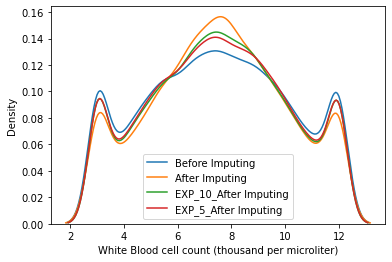

C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot

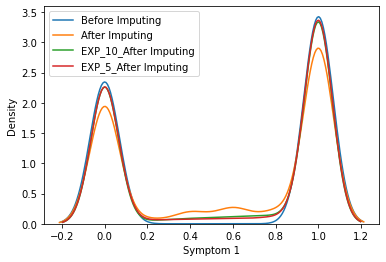

C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot

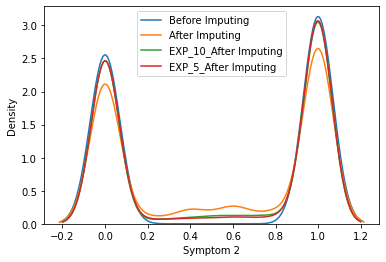

C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot

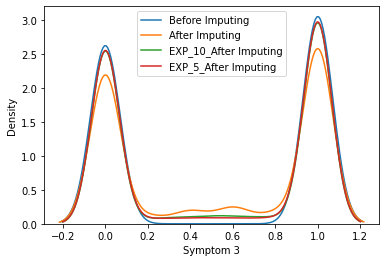

C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot

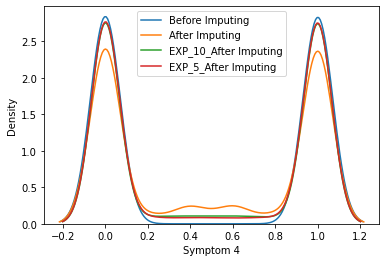

C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot

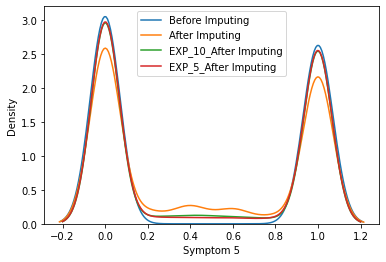

In [42]:
for i in numerical_df:
    sns.distplot(numerical_df[i], hist=False, label="Before Imputing")
    sns.distplot(num_imp[i], hist=False, label="After Imputing")
    sns.distplot(num_imp10[i], hist=False, label="EXP_10_After Imputing")
    sns.distplot(num_imp5[i], hist=False, label="EXP_5_After Imputing")
    plt.legend(loc='best')
    plt.show()

By this insight we can see that values are almost same but some columns are need to be looked.
We can perform better by **HyperParameter Tunning in KnnImputer**

### Categorical Df

In [ ]:
categorical_df = X[[feature for feature in X.columns if X[feature].dtype =='O']]
categorical_df.head(2)

#### Encoding The Categorical_df to impute Nan values

In [ ]:
for col in categorical_df:
    
    vl_cnts = [vc for vc in categorical_df[col].value_counts().keys()]
    dictn = {}
    
    for encode_value, index_no in enumerate(vl_cnts):
        dictn[index_no] = encode_value
    
    categorical_df[col] = categorical_df[col].map(dictn)

In [ ]:
categorical_df.head(2)

##### Categorical value without nan values

In [ ]:
cat_non_null = categorical_df.dropna()
cat_non_null.head(2)

##### Categorical value with nan values

In [ ]:
cat_with_na = categorical_df[categorical_df.isna().any(axis=1)]
cat_with_na.head(2)

#### Imputing nan values of Categorical values

In [ ]:
imputer_knn.fit(cat_non_null)

cat_imp = imputer_knn.transform(cat_with_na)

cat_imp = pd.DataFrame(cat_imp)
cat_imp.columns = cat_with_na.columns
cat_imp.head(2)

n_neighbour and weight is hyperparameter

#### Threshold need to be Performed

Here in  column's unique value you can see that the value is not discretly distributed[0, 1, 2, 3] but in [0.4, 0.8, 1, 0, 2.6, 3] so we need to make a thresholdlike  
<0.5 = 0, 
<= 1.5 = 1
<= 2.5 = 2

In [ ]:
for  col in cat_imp:
    for indx, val in enumerate(cat_imp[col]):
        
        if val <= 0.5:
            cat_imp[col][indx] = 0
            
        elif (val >0.5) & (val <= 1.5):
            cat_imp[col][indx] = 1
        
        elif (val >1.5) & (val <= 2.5):
            cat_imp[col][indx] = 2
            
        elif (val >2.5) & (val <= 3.5):
            cat_imp[col][indx] = 3
            
        elif (val >3.5) & (val <= 4):
            cat_imp[col][indx] = 4

#### Data Distribution

In [ ]:
for i in categorical_df:
    sns.distplot(categorical_df[i], hist=False, label="Before Imputing")
    sns.distplot(cat_imp[i], hist=False, label="After Imputing")
    plt.legend(loc='best')
    plt.show()

### Join cat_imp and **cat_non_null** as full Categorical df

In [ ]:
cat_full = pd.concat([cat_imp, cat_non_null], axis=0, ignore_index=True)
cat_full.shape

### Join num_imp and **num_non_null** as full Numerical df

In [ ]:
num_full = pd.concat([num_imp, num_non_null], axis=0, ignore_index=True)
num_full.shape

### Full DataFrame (cat + num)

In [ ]:
data = pd.concat([num_full, cat_full], axis=1)
data.head(2)

In [ ]:
data.shape

In [ ]:
cat_full.shape, X.shape, categorical_df.shape, cat_with_na.shape, cat_non_null.shape, cat_imp.shape, data.shape

In [ ]:
X.shape, data.shape

In [ ]:
cat_with_na.shape, cat_non_null.shape, cat_imp.shape,

In [ ]:
num_with_na.shape, num_non_null.shape, num_imp.shape,

In [ ]:
b = num_with_na.reset_index()
b.head(10)

In [ ]:
num_non_null.reset_index()


In [ ]:
a = num_full.reset_index()
a 

In [ ]:
19915*19

In [ ]:
dsfdsfdsd

### Dython Library

In [ ]:
from dython.nominal import associations

#### Correlation b/w categorical to Categorical

In [ ]:
# #associations(X[categorical_feature])['corr'] # to get only corr
# # associations(X[categorical_feature])['ax'] # to get only plot
# associations(X[categorical_feature], figsize=(15, 10)) # To get both


#### Correlation b/w Numerical to Categorical all

In [ ]:
# associations(X)

#### Correlation b/w Numerical to numerical

In [ ]:
X.corr()

from all this correlation we can get that only **Autopsy shows birth defect (if applicable)** has higher correlation with **status**

In [ ]:
dsfasdf

### Let's Impute

In [ ]:
# from sklearn.impute._iterative import IterativeImputer
# imputer_it = IterativeImputer()
# x1 = X.copy()
# imputer_it.fit_transform(x1)

In [ ]:
# from sklearn.impute import KNNImputer
# knn_imputer = KNNImputer()
# x2 = x1.copy()
# x2 = knn_imputer.fit_transform(x2)
# x3 = knn_imputer.transform(x1[['Patient Age']])

In [ ]:
# x2 = pd.DataFrame(x2)

### Encoding Categorical Data

get Some Information from Categorical value by Encoding The Categorical value

In [ ]:
# X[categorical_feature].head(2)

In [ ]:
# for i in X[categorical_feature].columns:
#     print(i)
#     print(X[categorical_feature][i].value_counts())
#     print("\n\n")

In [ ]:
# # Columns That should be Visualize with Countplot

# spcl_col = X[['Birth asphyxia', "Autopsy shows birth defect (if applicable)", "H/O radiation exposure (x-ray)", "H/O substance abuse", "Blood test result"]]

In [ ]:
# for i in spcl_col.columns:
#     sns.countplot(spcl_col[i], hue=y)
#     plt.show()

from this we can know that nominal encoding will be enough

##### Encode The Categorical Data

In [ ]:
# from sklearn.preprocessing import OneHotEncoder, LabelEncoder
# from sklearn.compose import ColumnTransformer

# transformer = ColumnTransformer(('ohe', OneHotEncoder(sparse=False, drop='first'),[1,2,3,4,8,9,10,11,12,15,16,19,20,22]),
                                              
#                                              ("lbl_encode", LabelEncoder(), [13,14,17,18,24]), remainder='passthrough')

# # transformer.fit_transform(X)

Not working

### Encoding Technique

In [ ]:
# x = X.copy()

In [ ]:
# ohe_col = pd.get_dummies(x[x.columns[[1,2,3,4,8,9,10,11,12,15,16,19,20,22]]], drop_first=True)

In [ ]:
# from sklearn.preprocessing import OneHotEncoder, LabelEncoder
# lbl_enc = LabelEncoder()

# for i in [13,14,17,18,24]:
#     x[x.columns[i]] = lbl_enc.fit_transform(x[x.columns[i]])

In [ ]:
# x.drop(X.columns[[1,2,3,4,8,9,10,11,12,15,16,19,20,22]], axis=1, inplace=True)


In [ ]:
# x1 = pd.concat([x, ohe_col], axis=1)
# x1.head()

Now find the Combination from Categorical value

In [ ]:
# plt.figure(figsize=(25, 20))
# sns.heatmap(x1.corr(), annot=True, linecolor='black', linewidths=1, cmap='Blues')
# plt.show()

In [ ]:
# from sklearn.impute._iterative import IterativeImputer
# imputer_it = IterativeImputer()
# x1 = X.copy()
# imputer_it.fit_transform(x1)

### Handling Imbalance Dataset by OverSampling

In [ ]:
# from imblearn.over_sampling import RandomOverSampler
# os = RandomOverSampler(0.5)

### New Style

##### categorical values without nan

In [ ]:
cat_n_null = X[categorical_feature].dropna()

In [ ]:
cat_n_null.head(2)

In [ ]:
cat = cat_n_null.copy()

In [ ]:
ohe_col = pd.get_dummies(cat[cat.columns[[0,1,2,3,4,5,6,7,8,11,12,15,16,17]]], drop_first=True)

In [ ]:
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, LabelEncoder
lbl_enc = LabelEncoder()
ord_enc = OrdinalEncoder()

In [ ]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
lbl_enc = LabelEncoder()

for i in [9,10,13,14,18]:
    cat[cat.columns[i]] = lbl_enc.fit_transform(cat[cat.columns[i]])

In [ ]:
cat.drop(cat_n_null.columns[[0,1,2,3,4,5,6,7,8,11,12,15,16,17]], axis=1, inplace=True)

In [ ]:
cat1 = pd.concat([cat, ohe_col], axis=1)
cat1.head()

###  Impute

In [ ]:
from sklearn.impute._iterative import IterativeImputer
imputer_it = IterativeImputer()
imputer_it.fit(cat1)

#### Categorical features with na

In [ ]:
categorical_df = X[categorical_feature]
categorical_df.head()

In [ ]:
cat_w_na = categorical_df[categorical_df.isna().any(axis=1)]
print(cat_w_na.shape)
cat_w_na.head()

#### Impute The Value

In [ ]:
cat_imp = cat_w_na.copy()

ohe_col_imp = pd.get_dummies(cat_imp[cat_imp.columns[[0,1,2,3,4,5,6,7,8,11,12,15,16,17]]], drop_first=True)

from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, LabelEncoder
lbl_enc = LabelEncoder()
ord_enc = OrdinalEncoder()

from sklearn.preprocessing import OneHotEncoder, LabelEncoder
lbl_enc = LabelEncoder()

for i in [9,10,13,14,18]:
    cat_imp[cat_imp.columns[i]] = lbl_enc.fit_transform(cat_imp[cat_imp.columns[i]])
    
cat_imp.drop(cat_w_na.columns[[0,1,2,3,4,5,6,7,8,11,12,15,16,17]], axis=1, inplace=True)

cat_imp1 = pd.concat([cat_imp, ohe_col], axis=1)
cat_imp1.head()

In [ ]:
cat_imp1["Birth asphyxia"].unique()

In [ ]:
cat_w_na.iteritems

In [ ]:
for i in cat_w_na.iteritems():
    print(i[1])

In [ ]:
for i in cat_w_na.iterrows().any:
    print(i)

In [ ]:
categorical_df.columns

In [ ]:
#instantiate both packages to use
encoder = OrdinalEncoder()
imputer = KNN()
# create a list of categorical columns to iterate over
cat_cols = categorical_df.columns

def encode(data):
    '''function to encode non-null data and replace it in the original data'''
    #retains only non-null values
    nonulls = np.array(cat_n_null.dropna())
    #reshapes the data for encoding
    impute_reshape = nonulls.reshape(-1,1)
    #encode date
    impute_ordinal = encoder.fit_transform(impute_reshape)
    #Assign back encoded values to non-null values
    categorical_df.columns.loc[categorical_df.columns.notnull()] = np.squeeze(impute_ordinal)
    return categorical_df.columns

#create a for loop to iterate through each column in the data
for columns in cat_cols:
    encode(impute_data[columns])

In [ ]:
#instantiate both packages to use
encoder = OrdinalEncoder()
#imputer = KNN()
# create a list of categorical columns to iterate over
cat_cols = categorical_df.columns

def encode(data):
    '''function to encode non-null data and replace it in the original data'''
    #retains only non-null values
    nonulls = np.array(data.dropna())
    #reshapes the data for encoding
    impute_reshape = nonulls.reshape(-1,1)
    #encode date
    impute_ordinal = encoder.fit_transform(impute_reshape)
    #Assign back encoded values to non-null values
    data.loc[data.notnull()] = np.squeeze(impute_ordinal)
    return data

#create a for loop to iterate through each column in the data
for columns in cat_cols:
    encode(categorical_df)

#### 1st

In [ ]:
nonulls = np.array(data['Gender'].dropna())
nonulls

In [ ]:
impute_reshape = nonulls.reshape(-1,1)
impute_reshape

In [ ]:
encoder = OrdinalEncoder()

impute_ordinal = encoder.fit_transform(impute_reshape)
impute_ordinal

In [ ]:
data.loc[data['Gender'].notnull()] = np.squeeze(impute_ordinal)

In [ ]:
data.loc[data['Gender'].notnull()] = 

In [ ]:
data.loc[data.notnull()] = np.squeeze(impute_ordinal)
data

#### 2nd

In [ ]:
nonullss = data['Gender'].dropna()
nonullss

In [ ]:
impute_reshapes = nonulls.reshape(-1,1)
impute_reshapes

In [ ]:
encoder = OrdinalEncoder()

impute_ordinals = encoder.fit_transform(impute_reshapes)
impute_ordinals

In [ ]:
data.loc[data.notnull()] = np.squeeze(impute_ordinals)
data

### Oderring

In [ ]:
categorical_df.head()

In [ ]:
for i in categorical_df:
    print("\n")
    print(categorical_df[i].value_counts())
    

In [ ]:
# {"slightly abnormal":0, "inconclusive":1, "normal":2, "abnormal":3}
# {"Singular":0, "Multiple":1}
# {"Yes":1, "No":0}
# {"Yes":1, "No":0, "-":2, "Not applicable":3}
# {"Yes":1, "No":0, "None":2, "Not applicable":3}
# {"Low":0, "High":1}
# {"Male":0, "Female":1, "Ambiguous":2}
# {"Yes":1, "No":0, "No record":2, "Not applicable":3}
# {"Alive":0, "Deceased":1}
# {"Normal (30-60)":0, "Tachypnea":1}
# {"Normal":0, "Tachycardia":1}

In [ ]:
for col in categorical_df:
    print("\n\n")
    print(col)
    print(categorical_df[col])
    print("\n")
    vl_cnts = [vc for vc in categorical_df[col].value_counts().keys()]
    print(vl_cnts)
    dictn = {}
    print("\n")
    
    for encode_value, index_no in enumerate(vl_cnts):
        dictn[index_no] = encode_value
        
    print(dictn)
    
    categorical_df[col] = categorical_df[col].map(dictn)

In [ ]:
categorical_df.head()